In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import StandardScaler

In [4]:
nutrient = pd.read_csv('nutrient.csv', index_col=0)

scaler = StandardScaler()
nutrientcaled = scaler.fit_transform(nutrient)

Calculating the linkages

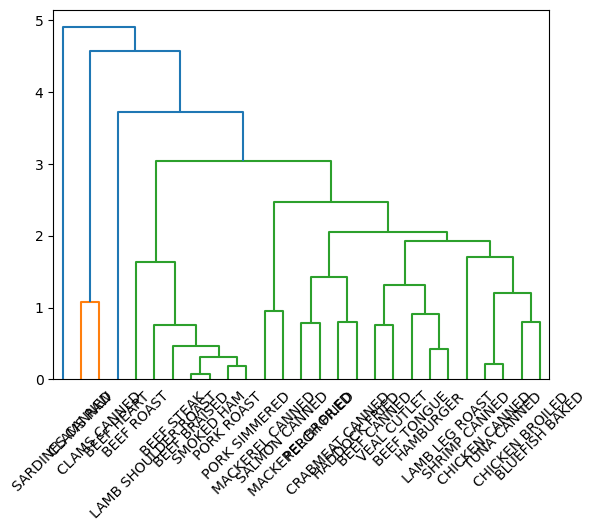

In [5]:
mergings = linkage(nutrientcaled, method='average')
dendrogram(mergings, labels=list(nutrient.index),leaf_rotation=45, leaf_font_size=10)
plt.show()

sklearn

In [6]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

clustering = AgglomerativeClustering(n_clusters=2, linkage='average')
clustering.fit(nutrientcaled)

print(clustering.labels_)
print(silhouette_score(nutrientcaled, clustering.labels_))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
0.41345065968561695


In [7]:
from sklearn.pipeline import Pipeline

clustering = AgglomerativeClustering(n_clusters=2, linkage='average')
pipe = Pipeline([('SCL', scaler), ('CLUST', clustering)])
pipe.fit(nutrient)
nutrientcaled = scaler.fit_transform(nutrient)
print(clustering.labels_)
print(silhouette_score(nutrientcaled, clustering.labels_))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
0.41345065968561695
